In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [25]:
ROOT = Path.cwd().resolve().parent
DATA = ROOT / "Data" / "Sunspots.csv"

In [40]:
df = pd.read_csv(DATA, index_col=0)
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


Veamos si tenemos valores nulos

In [27]:
df.isnull().any().any()

np.False_

In [28]:
df.isnull().sum()

Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64

Como podemos ver no tenemos columnas con valores NaN

Ahora, veamos si nuestro dataset siempre tiene un mes de diferencia entre registro

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) # Pasaremos la columna Date a formato datetime

In [55]:
diff = df['Date'].dt.to_period('M').astype('int64').diff() # Calculamos la diferencia entre meses

In [56]:
diff #Pareciera que todos los datos tienen un mes de diferencia

0       NaN
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3260    1.0
3261    1.0
3262    1.0
3263    1.0
3264    1.0
Name: Date, Length: 3265, dtype: float64

In [53]:
es_consecutivo = (diff.dropna() == 1).all()
print(es_consecutivo)
# True -> Todos los valores son 1 lo que implica que tenemos una serie de tiempo limpia
# False -> Hay huecos o fechas repetidas

True


Podemos concluir que tenemos una serie de tiempo con intervalos de tiempo discreta donde la unidad es mes y no hay datos faltantes.

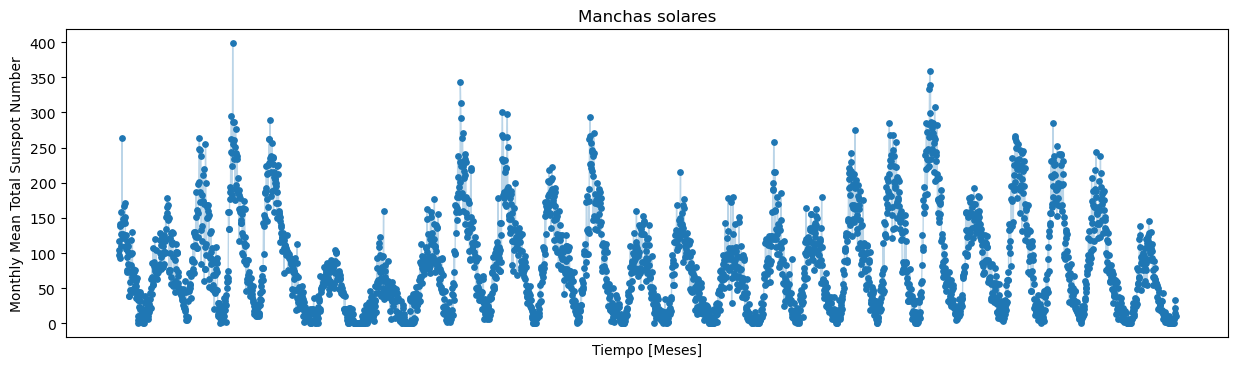

In [33]:
plt.figure(figsize=(15,4))
plt.plot(df['Date'], df['Monthly Mean Total Sunspot Number'],
         linestyle='-', alpha=0.3, linewidth=1)
plt.scatter(df['Date'], df['Monthly Mean Total Sunspot Number'],
            s=15)
plt.xticks([])
plt.title('Manchas solares')
plt.xlabel('Tiempo [Meses]')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.show()
